<a href="https://colab.research.google.com/github/yohanesnuwara/open-geoscience-repository/blob/master/how_to_access_public_geoscience_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Access the Public geoscience Data from Google Drive to Google Colab

> (Yohanes Nuwara, [ign.nuwara97@gmail.com](ign.nuwara97@gmail.com))

In this tutorial we will learn how to:

* Access to our Google Drive account via Google Colab
* Use basic Linux shell scripting e.g. `cd` and `ls` to inspect the directories
* Unzip `.ZIP` files directly from the Google Drive to our working directory here
* Open `.PNG` figures in Python
* Open some geoscience data formats, e.g. `.LAS` well-log data files and `.SGY` or `.SEGY` seismic data files

Now, we assume that we have read the [README](https://github.com/yohanesnuwara/open-geoscience-repository#how-to-access-these-data) on how to access the data in the `open-geoscience-repository`. We have now the `Public geoscience Data` database in our `My Drive`. Now, let's access to our Google Drive account. 

Run the following code. We will get an **output** with a link after that, click on the link, and proceed the instruction. Then, we will get an **authorization code** to be pasted in the output. The press `Enter` to proceed the authorization.

If successfull, we will get this output:
`Mounted at /content/drive`

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, we will have our Google Drive directories in our Google Colab. To enter the `Public geoscience Data` directory, we use `cd`. 

In [0]:
cd /content/drive/'My Drive'/'Public geoscience Data'

/content/drive/My Drive/Public geoscience Data


Code `ls -l` to see what's inside the `Public geoscience Data` directory.

In [0]:
ls -l

total 181225
dr-x------ 2 root root      4096 Jan  7  2019 '48 well composite logs in machine readable format'/
dr-x------ 2 root root      4096 Dec  4 11:00 'Canning 3D TDQ'/
dr-x------ 2 root root      4096 May 16  2019 'collection of geological images for classification'/
dr-x------ 2 root root      4096 Sep 26  2017 'Dutch F3 seismic data'/
dr-x------ 2 root root      4096 Nov 10  2017 'F3 seismic data plus classification data for machine learning '/
dr-x------ 2 root root      4096 May 28  2019 'GEOLINK North sea wells with Lithology interpretation'/
dr-x------ 2 root root      4096 Sep 14  2018 'geolocate documents with shapefiles'/
-r-------- 1 root root   4198953 Oct  9  2017 'malenov user guide.pdf'
-r-------- 1 root root 181325755 Sep 14  2018 'Norwegian  paper completion logs with lithology lables.zip'
dr-x------ 2 root root      4096 Sep 11  2018 'Norwegian well  completion reports and label data for hydrocarbon shows'/
dr-x------ 2 root root      4096 May 30  2018 'Poseido

There are overall 12 folders inside this `Public geoscience Data` directory. There is 1 file with extension `.zip`.

We will inspect the files inside these 12 folders. If we would like to inspect the files inside these directories, of course, it will be very tedious to use `cd` and `ls`. 

Eye on the left screen, there are 3 symbols. Choose the `Files` symbol, we will find `drive`, which is our Google Drive, then expand it. Search for the directory `Public geoscience Data` and expand them to inspect what's inside.

Below is a summary of the contents.

|Folder|Content|File extensions|
|:---:|:---:|:---:|
|48 well composite logs in machine readable format|one ZIP file|.zip|
|Canning 3D TDQ|3D Seismic|.sgy|
|collection of geological images for classification|Geoscience figures|.png, .jpg|
|Dutch F3 seismic data|3D seismic|.segy|
|F3 seismic data plus classification data for machine learning|3D seismic, Python script|.segy, .py|
|GEOLINK North sea wells with Lithology interpretation|Lithology and wells, Excel spreadsheet|.zip, .xlsx, .png|
|geolocate documents with shapefiles|one ZIP file|.zip|
|Poseidon Seismic and well data NW Shelf Australia|Core images, Excel spreadsheet, 3D seismic, report|.segy, .las, .xlsx, .pdf| 
|public Core images and core interpretation|Core descriptions|.zip, .las, .pdf, .tiff, .jpg| 
|RealRocks RealPore RealLogs Public Geoprovider sponsored|ZIP files, Excel spreadsheet|.zip, .xlsx|
|reports for images|Documents, reports|.pdf|

Overall, we have various extensions. We will access these. The following is tutorial to access each of these files. 

## Unzip `.ZIP` Files

We will need to import Python library `zipfile`

In [0]:
import zipfile

From the summary table above, there are at least 5 folders containing `.zip` files. To see in details, we could inspect the exact directory location that contains the `.zip` files by executing this code.

In [0]:
!find . -type f -name "*.zip"

./Poseidon Seismic and well data NW Shelf Australia/All wells data logs and reports/Spliced well logs provided by occam technology /public wells poseidon 3D Petrel project.zip
./Poseidon Seismic and well data NW Shelf Australia/Ascii velocity field data migration vels/Poseidon ascii velocities.zip
./Norwegian well  completion reports and label data for hydrocarbon shows/Norwegian composite logs released cc_by.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well_core images 6406_3_2.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well_core images_6506_12_5.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well core images_ 6506_12_6.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well_ core images 6507_7_4.zip
./geolocate documents with shapefiles/location_shape_files_npd.zip
./No

We will take only three examples. First, we want to unzip in the folder `48 well composite logs in machine readable format`. 

Do the following:

`!unzip '... file path ...' -d '... to new folder name ...'` 

Meaning, we extract the `.zip` file from the file path, and it will be stored in a certain path directory of our interest, for example here is `/content/well composites`. The path folder will be automatically created and the extracted files will be stored there.

In [0]:
!unzip '/content/drive/My Drive/Public geoscience Data/48 well composite logs in machine readable format/48_well composite logs machine readable.zip' -d '/content/well composites'

Archive:  /content/drive/My Drive/Public geoscience Data/48 well composite logs in machine readable format/48_well composite logs machine readable.zip
   creating: /content/well composites/well composites/well_15_12_4/
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_1_-150_150_complog_header.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_2_150_800.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_3_800_1300.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_4_1300_1900.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_5_1900_2600.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_6_2600_3150.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_7_3150_3450_complog_footer.png  
   creating: /content/well composites/well composites/well_15_2_1/
  inflating: /content/well composites

Unzipping is successfull!

Now we can inspect our extracted files in our new path directory `/content/well composites`. Still remember? We could use `ls` or go directly to the `Files` pane on the left of the screen.

In [0]:
ls '/content/well composites'

 well_15_12_4/    well_15_6_8_S/   well_30_6_11/     well_7_11_6/
 well_15_2_1/     well_15_9_1/     well_30_6_13/     well_7_11_7/
 well_15_3_1/     well_30_2_1/     well_30_6_14/     well_7_11_8/
 well_15_3_3/     well_30_2_2/     well_30_6_15/     well_7_11_9/
 well_15_3_4/     well_30_2_3/     well_30_6_16/     well_7_12_11/
 well_15_3_5/     well_30_3_3/     well_30_6_17_A/   well_7_12_3_A/
 well_15_5_1/     well_30_3_4_B/   well_30_6_17_R/   well_7_12_5/
 well_15_5_2/     well_30_3_5_S/   well_30_6_2/      well_7_12_7/
 well_15_5_4/     well_30_3_6_S/   well_30_6_4/      well_7_12_8/
 well_15_5_5/     well_30_3_7_A/   well_30_6_5/     'well composites'/
 well_15_5_6/     well_30_3_7_S/   well_30_6_7/
 well_15_6_7/     well_30_5_2/     well_7_11_10_S/
 well_15_6_8_A/   well_30_6_10/    well_7_11_5/


Now, if we see what's inside the folder `well_15_12_4`, there are `.png` figures. 

We will now learn how to open `.png` figures. 

## Open `.PNG` Image Files

First we import `PIL` library. From the `PIL` library, we use `Image` module.

In [0]:
from PIL import Image

We will open one file named `15_12_4_1_-150_150_complog_header.png` in the folder `well_15_12_4`. 

Run `Image.open("... file path ...")`

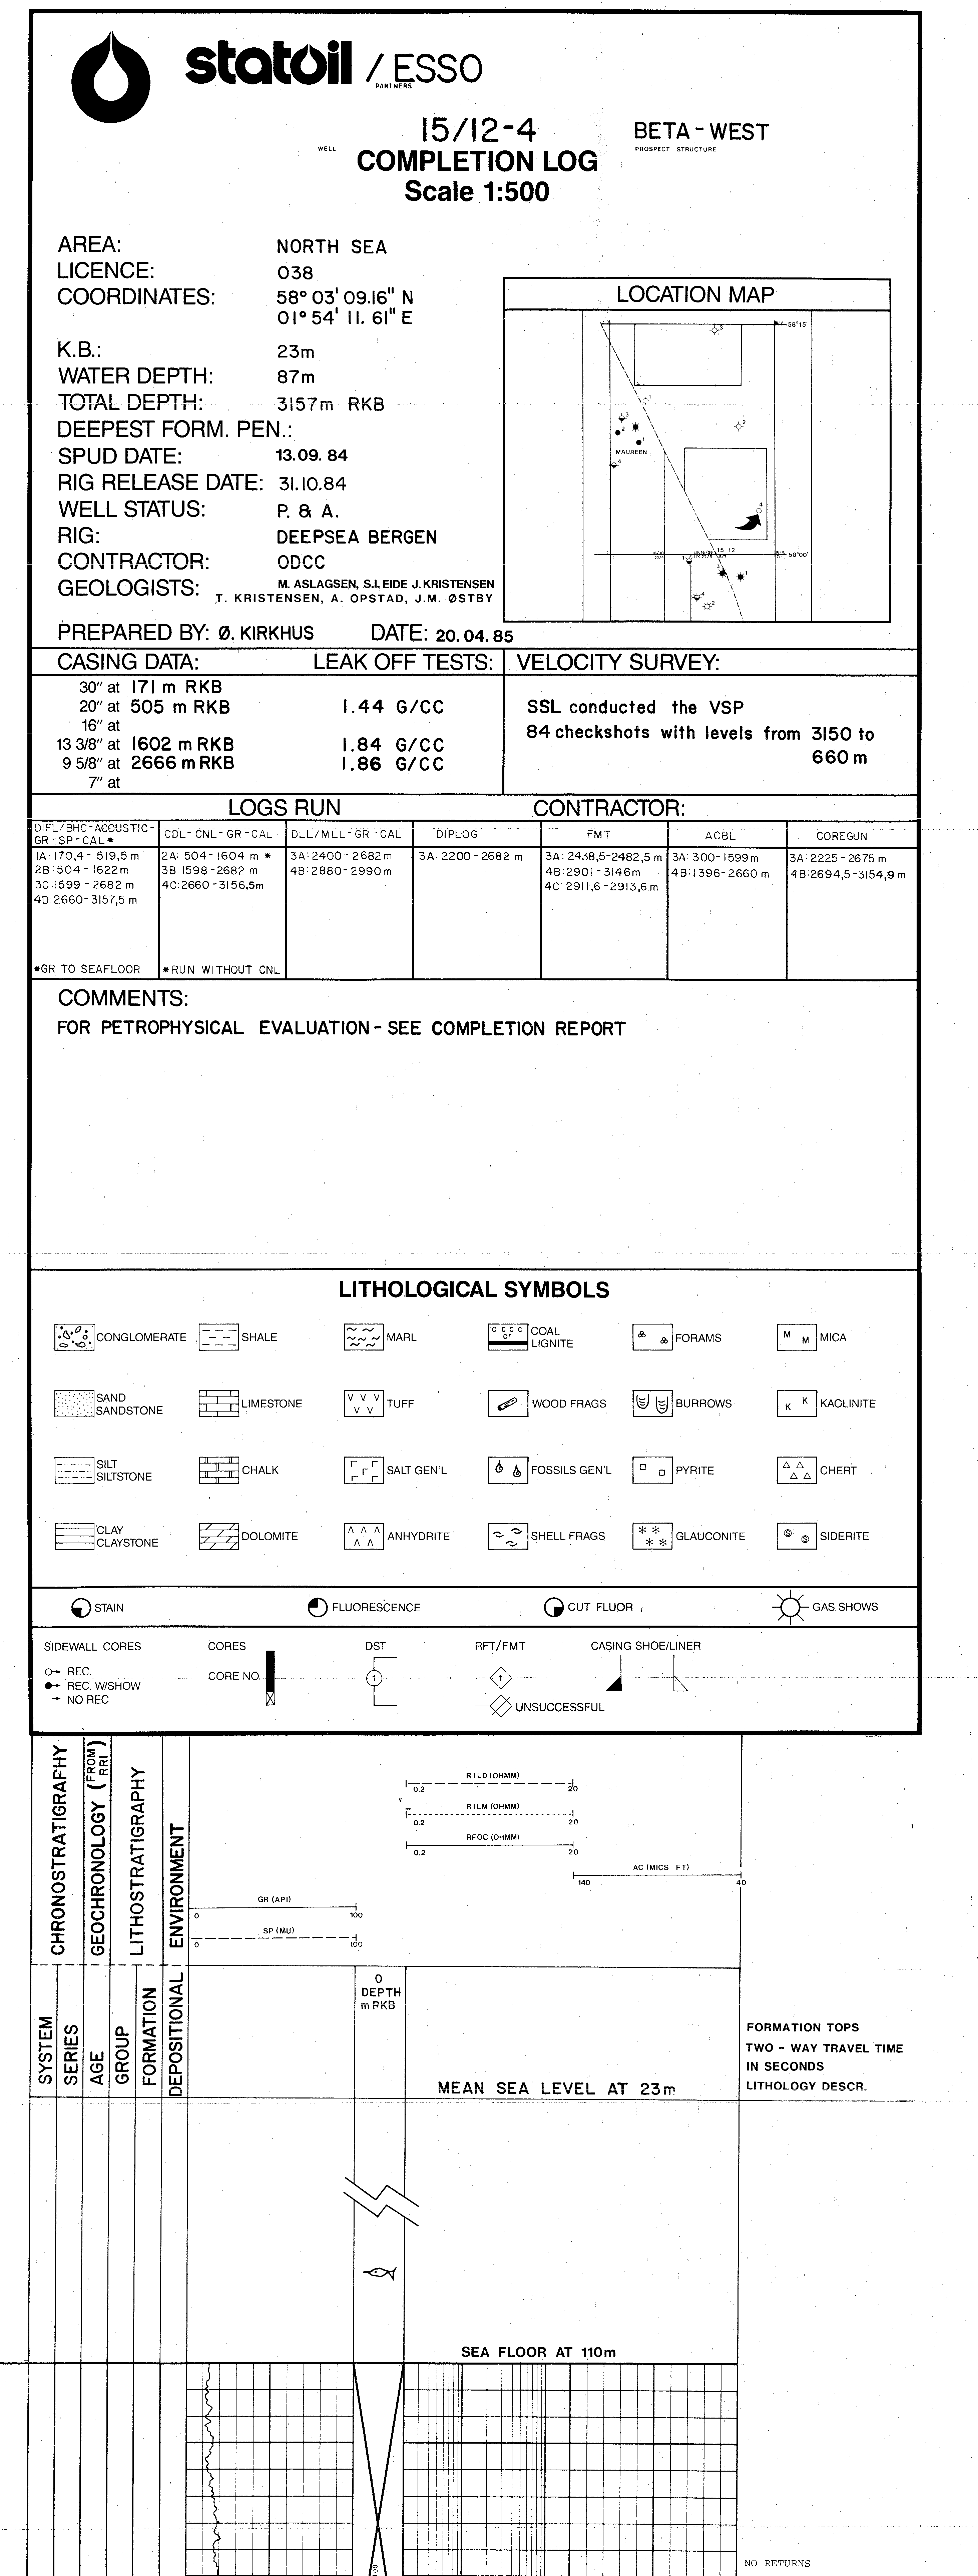

In [0]:
img = Image.open("/content/tmp/well composites/well_15_12_4/15_12_4_1_-150_150_complog_header.png")
img

This is a completion log acquired by Statoil ASA on 13 September 1984 (spud date) in the Deepsea Bergen rig. 

Next!

We will try another example of **unzipping a file** that contains also a `.png` file. The folder name is: `GEOLINK North sea wells with Lithology interpretation`. We will place the extracted files in our new directory `GEOLINK North Sea`

In [0]:
!unzip '/content/drive/My Drive/Public geoscience Data/GEOLINK North sea wells with Lithology interpretation/GEOLINK_Lithology and wells NORTH SEA.zip' -d '/content/GEOLINK North Sea'

Archive:  /content/drive/My Drive/Public geoscience Data/GEOLINK North sea wells with Lithology interpretation/GEOLINK_Lithology and wells NORTH SEA.zip
  inflating: /content/GEOLINK North Sea/15_9-12.las  
  inflating: /content/GEOLINK North Sea/15_9-13.las  
  inflating: /content/GEOLINK North Sea/15_9-14.las  
  inflating: /content/GEOLINK North Sea/15_9-15.las  
  inflating: /content/GEOLINK North Sea/15_9-17.las  
  inflating: /content/GEOLINK North Sea/15_9-18.las  
  inflating: /content/GEOLINK North Sea/15_9-19 A.las  
  inflating: /content/GEOLINK North Sea/15_9-19 B.las  
  inflating: /content/GEOLINK North Sea/15_9-2.las  
  inflating: /content/GEOLINK North Sea/15_9-22.las  
  inflating: /content/GEOLINK North Sea/15_9-23.las  
  inflating: /content/GEOLINK North Sea/15_9-4.las  
  inflating: /content/GEOLINK North Sea/15_9-5.las  
  inflating: /content/GEOLINK North Sea/15_9-7.las  
  inflating: /content/GEOLINK North Sea/15_9-8.las  
  inflating: /content/GEOLINK North Se

Inspect the file contents

In [0]:
ls '/content/GEOLINK North Sea'

 15_9-12.las      '25_8-5 S.las'    '34_11-3 T2.las'
 15_9-13.las       25_8-7.las        34_12-1.las
 15_9-14.las       25_8-9.las       '34_2-2 R.las'
 15_9-15.las       25_9-1.las        34_2-4.las
 15_9-17.las       26_4-1.las       '34_3-1 A.las'
 15_9-18.las       29_3-1.las       '34_3-1 S.las'
'15_9-19 A.las'    29_6-1.las       '34_3-2 S.las'
'15_9-19 B.las'    30_11-3.las      '34_3-3 A.las'
 15_9-22.las       30_2-1.las       '34_3-3 S.las'
 15_9-23.las       30_2-2.las       '34_4-10 R.las'
 15_9-2.las       '30_3-2 R.las'     34_4-2.las
 15_9-4.las        30_3-3.las        34_4-3.las
 15_9-5.las       '30_3-4 R.las'     34_4-5.las
 15_9-7.las       '30_3-5 S.las'    '34_5-1 A.las'
 15_9-8.las        30_4-1.las       '34_5-1 S.las'
 15_9-9.las        30_4-2.las       '34_6-1 S.las'
 16_10-1.las       30_6-11.las       34_7-12.las
 16_10-2.las       30_6-14.las       34_7-13.las
 16_10-3.las       30_6-19.las      '34_7-15 S.las'
 16_10-4.las       30_6-22.las       34_7-16.

As we can see, it contains also `.LAS` files, which are the **well logs** files. In the next Section we will cover up how to open these files.

But now, we focus on opening an image file, which we can find out: `location of wells.png`. Open again with `Image.open()`

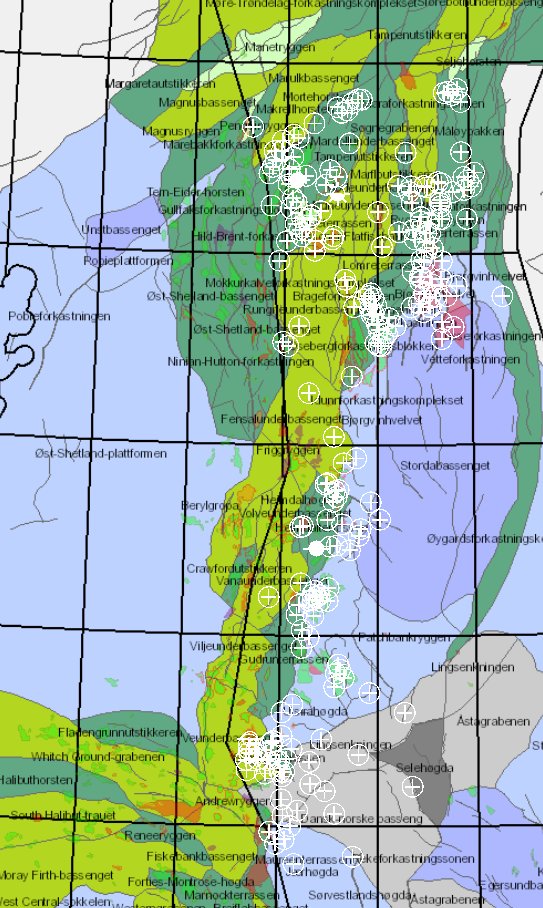

In [0]:
img = Image.open("/content/GEOLINK North Sea/location of wells.png")
img

It's a North Sea map with coordinates of the wells. 

We already know now how to unzip `.ZIP` files and how to open `.PNG` image files, now let's move on to the next tutorial on how to open `.LAS` well-log data files.

## Open `.LAS` Well-log files

Now starts the **REAL GEOSCIENCE!** We will look into the well-log data i.e. visualizing it. This introductory tutorial is intended only to know how to open the `.LAS` file. More tutorials on well-log analysis will be in separate notebooks. 

First, we install `lasio` library.

In [0]:
!pip install lasio

Then, import the `lasio`

In [0]:
import lasio

In the folder that we're interested in, `GEOLINK North Sea`, there are more than 30 `.LAS` files. We will open and read just one of the files, for instance: `15_9-12.las` from well `15_9-12`. We use: `lasio.read(... file path ...)`

In [0]:
well15_9_2 = lasio.read('/content/GEOLINK North Sea/15_9-12.las')

Finished reading the file, we have now unboxed the file. We may first of all be interested to know what kinds of data present. We use: `name-of-well.keys()` 

In [0]:
well15_9_2.keys()

['DEPT',
 'LITHOLOGY_GEOLINK',
 'CALI',
 'DRHO',
 'NPHI',
 'RHOB',
 'GR',
 'DTC',
 'DTE',
 'RDEP',
 'SP',
 'RSHA',
 'RXO',
 'RMED']

The log file has caliper, density correction log (DRHO), neutron porosity (NPHI), bulk density (RHOB), Gamma Ray (GR), Compressional Sonic Depth-Time (DTC), Elastic Sonic Depth-Time (DTE), spontaneous potential (SP), and some resistivity logs.

Next thing, we should be interested to view the header data. A `.LAS` header will contain information about: (1) Acquisition detail, and (2) Mnemonic and units of logs

Now, let's into the acquisition detail header. We simply use `name-of-well.well`

In [0]:
well15_9_2.well

[HeaderItem(mnemonic=STRT, unit=m, value=493.49313354, descr=),
 HeaderItem(mnemonic=STOP, unit=m, value=3752.5666504, descr=),
 HeaderItem(mnemonic=STEP, unit=m, value=0.0, descr=),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=),
 HeaderItem(mnemonic=COMP, unit=, value=, descr=COMPANY),
 HeaderItem(mnemonic=WELL, unit=, value=15/9-12, descr=WELL),
 HeaderItem(mnemonic=FLD, unit=, value=, descr=FIELD),
 HeaderItem(mnemonic=LOC, unit=, value=, descr=LOCATION),
 HeaderItem(mnemonic=SRVC, unit=, value=, descr=SERVICE COMPANY),
 HeaderItem(mnemonic=DATE, unit=, value=2018-09-11 14:47:59   : Log Export Da...),
 HeaderItem(mnemonic=PROV, unit=, value=, descr=PROVINCE),
 HeaderItem(mnemonic=UWI, unit=, value=15/9-12, descr=UNIQUE WELL ID),
 HeaderItem(mnemonic=API, unit=, value=, descr=API NUMBER)]

The log is acquired in 11 September 2018, with start depth at 493 m, and total depth of 3752.57 m.

Next, we would like to know the mnemonics and units of the data. We use: `name-of-well.curves`

In [0]:
well15_9_2.curves

[CurveItem(mnemonic=DEPT, unit=m, value=, descr=DEPTH, original_mnemonic=DEPT, data.shape=(21386,)),
 CurveItem(mnemonic=LITHOLOGY_GEOLINK, unit=_, value=, descr=Lithology_geolink, original_mnemonic=LITHOLOGY_GEOLINK, data.shape=(21386,)),
 CurveItem(mnemonic=CALI, unit=in, value=, descr=CALI, original_mnemonic=CALI, data.shape=(21386,)),
 CurveItem(mnemonic=DRHO, unit=g/cm3, value=, descr=DRHO, original_mnemonic=DRHO, data.shape=(21386,)),
 CurveItem(mnemonic=NPHI, unit=m3/m3, value=, descr=NPHI, original_mnemonic=NPHI, data.shape=(21386,)),
 CurveItem(mnemonic=RHOB, unit=g/cm3, value=, descr=RHOB, original_mnemonic=RHOB, data.shape=(21386,)),
 CurveItem(mnemonic=GR, unit=gAPI, value=, descr=GR, original_mnemonic=GR, data.shape=(21386,)),
 CurveItem(mnemonic=DTC, unit=us/ft, value=, descr=DTC, original_mnemonic=DTC, data.shape=(21386,)),
 CurveItem(mnemonic=DTE, unit=us/ft, value=, descr=DTE, original_mnemonic=DTE, data.shape=(21386,)),
 CurveItem(mnemonic=RDEP, unit=ohm.m, value=, de

We have now acquired so much information about this log data! Next, as I believe we have already guessed, is to visualize one of the curves. For instance, we are interested to view the **RHOB log**

The log data here has been transformed by our library `lasio` into a form of arrays (`numpy array`). We could just use `name-of-well['RHOB']` to see the RHOB data array.

In [0]:
well15_9_2['RHOB']

array([1.78900003, 1.75399995, 1.778     , ..., 2.58599997, 2.58599997,
       2.58599997])

Let's now visualize this data. In Python, the library for visualization is `matplotlib` with `pyplot` as its module. Import the library first

In [0]:
import matplotlib.pyplot as plt

Next, we get to plot by `plt.plot(xdata, ydata)`, with `xdata` is the RHOB, and `ydata` is the depth. Then, add several attributes (title, labels), and also don't forget to reverse the `y_axis` because it's a depth data. The script are as follows:

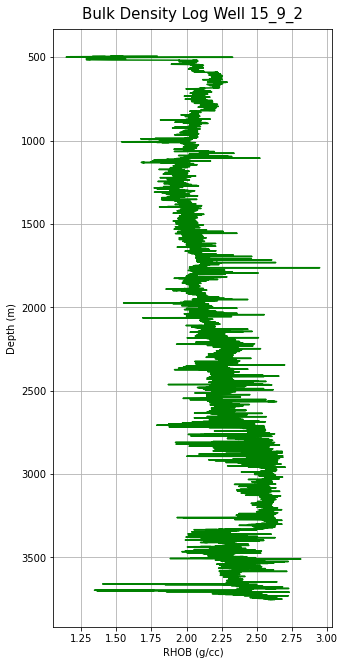

In [0]:
plt.figure(figsize=(5,11)) # chart size

plt.plot(well15_9_2['RHOB'], well15_9_2['DEPT'], color='green') # plot the data
plt.title('Bulk Density Log Well 15_9_2', size=15, pad=10)
plt.xlabel("RHOB (g/cc)"); plt.ylabel("Depth (m)") # labels
plt.grid(True) # give chart grids
plt.gca().invert_yaxis() # invert y-axis
plt.show()

## Open Seismic `.SGY` or `.SEGY` Files

We will open one of three 3D seismic data files (Canning TDQ 3D, Poseidon 3D, Dutch F3) in `.SGY` or `.SEGY` format, which is the Dutch F3. 

As we will use `segyio` library by Equinor AS, a popular library for seismic data parsing and processing, some source codes or scripts of this tutorial is adopted from the `segyio` documentation [1](https://github.com/equinor/segyio-notebooks/blob/master/notebooks/basic/02_segy_quicklook.ipynb), [2](https://github.com/equinor/segyio-notebooks/blob/master/notebooks/pylops/01_seismic_inversion.ipynb), [3](https://github.com/equinor/segyio/pull/371/files)  

First, install `segyio`

In [0]:
!pip install segyio

     |████████████████████████████████| 92kB 3.8MB/s 


Then import `segyio`. We will also need `numpy`, `pandas`, and `re`.

In [0]:
import segyio
import numpy as np
import pandas as pd
import re

### Dutch F3

Specify the file path of Dutch F3 Seismic data

In [0]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

Our purpose now is to visualize the Dutch F3. It's important that we know the range of the **inline** and the **crossline**. We also need to normalize our plot later by calculating the **percentile of its amplitude**.



In [85]:
with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = f.trace.raw[:]
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250


'The 99th percentile is 6517; the max amplitude is 32767'

We already know the inline and crossline range. We can now display Dutch F3 at **Inline 500**

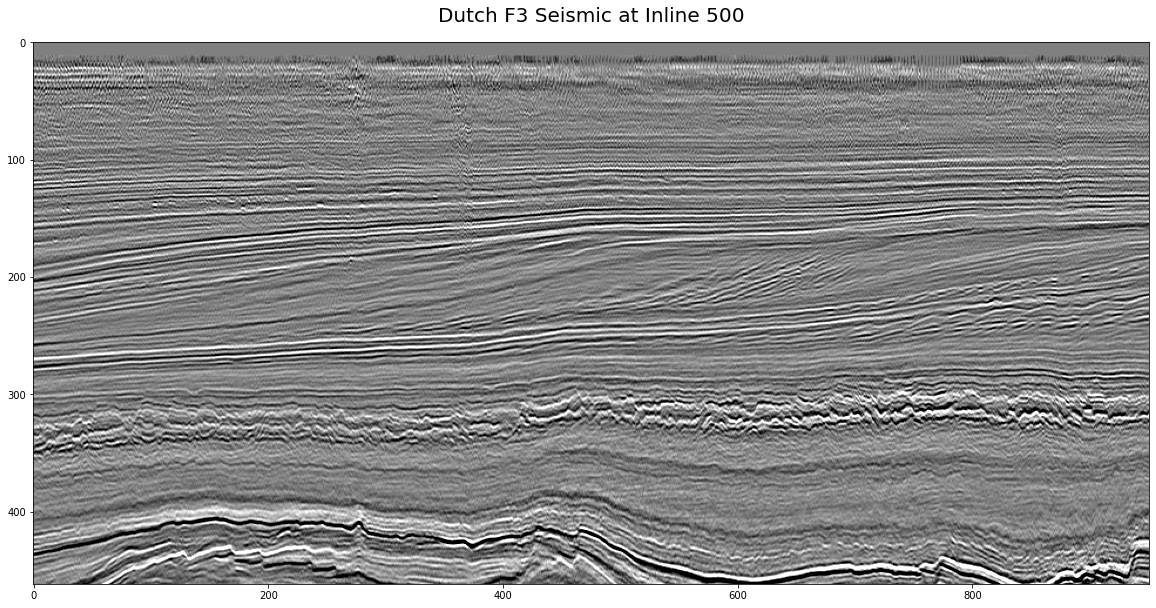

In [0]:
with segyio.open(filename) as f:
    inline_number = 500
    inline_slice = f.iline[inline_number]   
    plt.figure(figsize=(20, 10))
    plt.title('Dutch F3 Seismic at Inline {}'.format(inline_number), size=20, pad=20)
    plt.imshow(inline_slice.T, cmap="gray", vmin=-vm, vmax=vm) # other cmap = "RdBu"
    plt.show()

And **Crossline 1000**

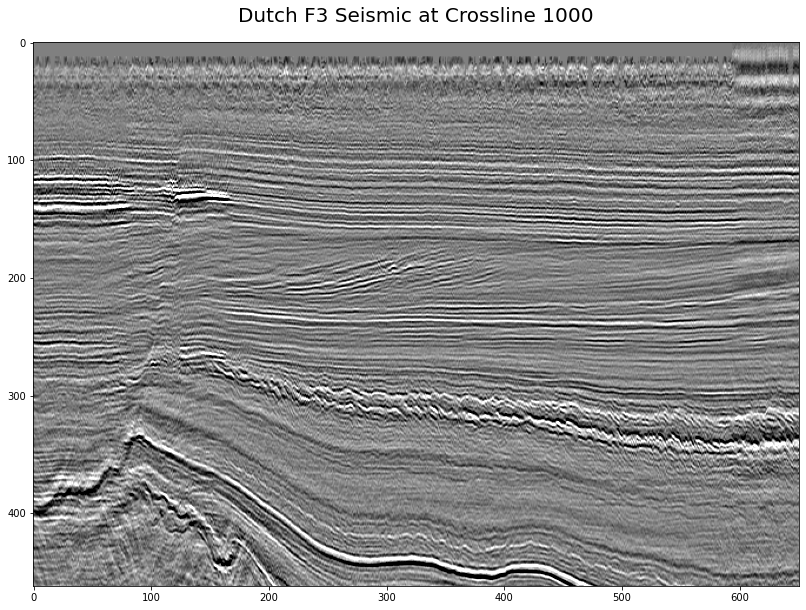

In [0]:
with segyio.open(filename) as f:
    xline_number = 1000
    xline_slice = f.xline[xline_number]   
    plt.figure(figsize=(20, 10))
    plt.title('Dutch F3 Seismic at Crossline {}'.format(xline_number), size=20, pad=20)
    plt.imshow(xline_slice.T, cmap="gray", vmin=-vm, vmax=vm)
    plt.show()

# Summary

We have now successfully accessed an open `Public geoscience Data` from Google Drive in Google Colab. We now know how to unzip files, access well-log data and seismic data, and display the data. 